In [1]:
from fastai.vision import *
from fastai import *

empty_data = ImageDataBunch.single_from_classes("data/", ["not_brvtal","brvtal"], size=28)
learn = create_cnn(empty_data, models.resnet18)
learn = learn.load("brvtality-72")
all_data_bunch = ImageDataBunch.from_csv("data/", csv_labels="brvtality_all.csv", size=28, valid_pct=0.1)
all_data = all_data_bunch.train_ds + all_data_bunch.valid_ds

In [2]:
all_preds = []
for i in all_data:
    calc_cat, _, probs = learn.predict(i[0])
    brvtality = probs[1]
    cats = str(i[1])
    all_preds.append({"image": i[0], "real_categories": cats, "brvtality": brvtality,
                      "decision": calc_cat, "cat_set": set(cats.split())})

In [3]:
all_preds[0]

{'image': Image (3, 150, 150),
 'real_categories': 'brvtal not_brvtal',
 'brvtality': tensor(0.9398),
 'decision': 'brvtal',
 'cat_set': {'brvtal', 'not_brvtal'}}

In [4]:
learn.predict(i[0])

('not_brvtal', tensor(0), tensor([0.6253, 0.3747]))

In [5]:
def plot_stuff(data):
    """Expects list of image,caption two-tuples"""
    data = list(data)
    cols = 4
    rows = math.ceil(len(data) / 4)
    fig, axes = plt.subplots(rows, cols, figsize=(12,12))
    for i in range(len(data)):
        im = data[i][0]
        im.show(ax=axes.flat[i], title=data[i][1])

In [6]:
most_brvtal = sorted(all_preds, key=lambda x: x["brvtality"])

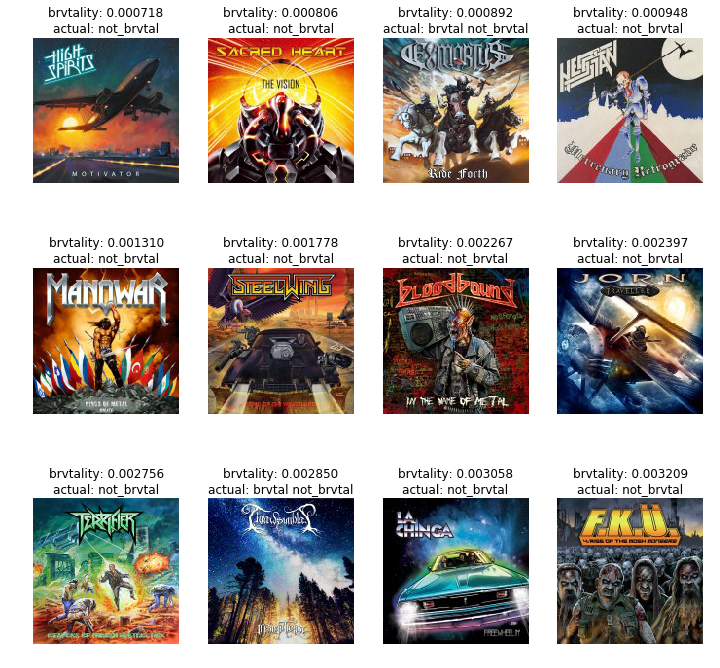

In [7]:
plot_stuff((i["image"], "brvtality: {:f}\nactual: {}".format(i["brvtality"], i["real_categories"]))
           for i in most_brvtal[:12])

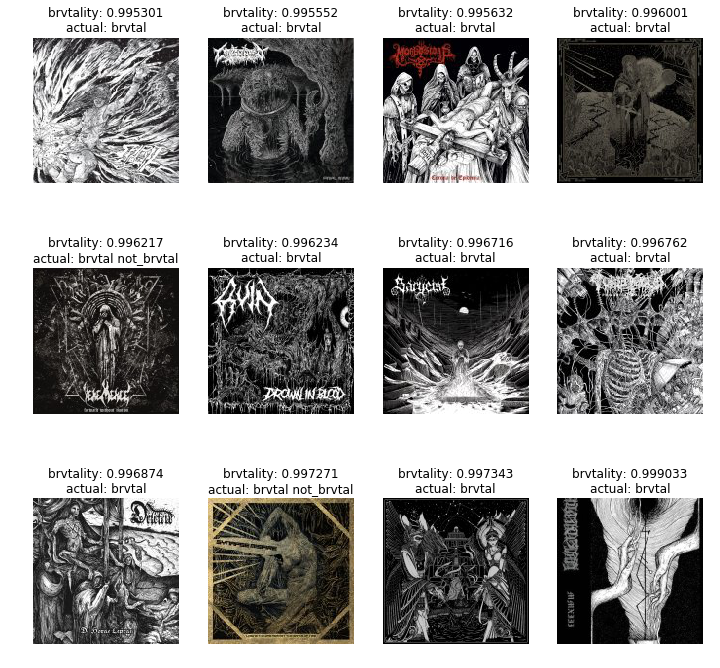

In [8]:
plot_stuff((i["image"], "brvtality: {:f}\nactual: {}".format(i["brvtality"], i["real_categories"]))
           for i in most_brvtal[-12:])

In [9]:
most_wrong = [i for i in most_brvtal if (i["brvtality"] > 0.5 and i["cat_set"] == {"not_brvtal"})
              or (i["brvtality"] < 0.5 and i["cat_set"] == {"brvtal"})]

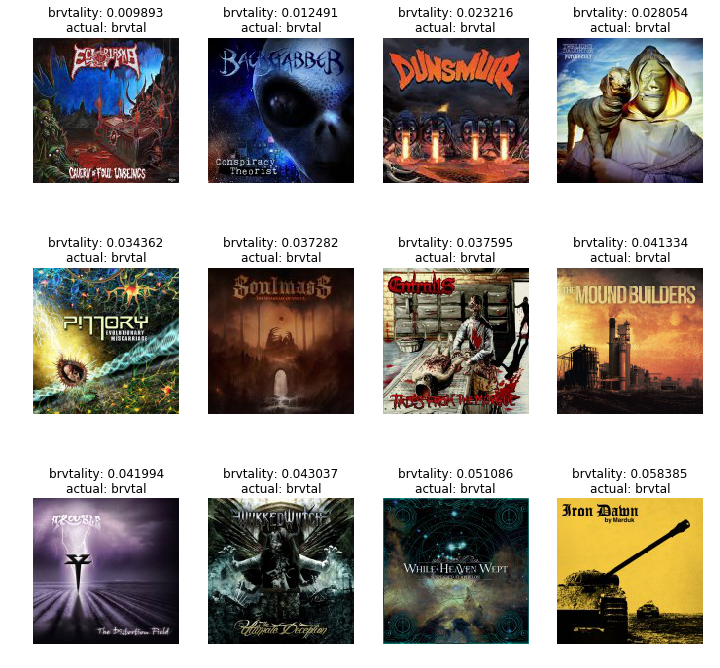

In [10]:
plot_stuff((i["image"], "brvtality: {:f}\nactual: {}".format(i["brvtality"], i["real_categories"]))
           for i in most_wrong[:12])

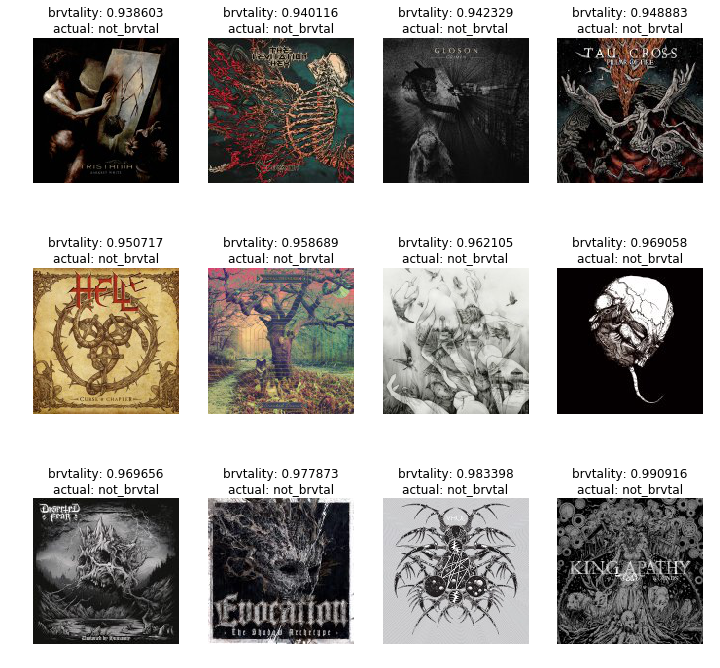

In [11]:
plot_stuff((i["image"], "brvtality: {:f}\nactual: {}".format(i["brvtality"], i["real_categories"]))
           for i in most_wrong[-12:])